### Libraries and includes
---

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Download and process the data set
---



##### Download from github

In [2]:
!git clone https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 59481, done.
remote: Counting objects: 100% (20181/20181), done.
remote: Compressing objects: 100% (20170/20170), done.
remote: Total 59481 (delta 9), reused 20180 (delta 8), pack-reused 39300
Receiving objects: 100% (59481/59481), 767.43 MiB | 17.12 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Checking out files: 100% (59380/59380), done.


In [ ]:
!cd DL_Data_sets/ && cd German_Traffic_signs && ls

Images	Readme-Images.txt


In [ ]:
!ls && cd DL_Data_sets/ && ls && cd German_Traffic_signs && ls

DL_Data_sets  sample_data
Dogs_vs_cats	      images   miml_dataset  README.md
German_Traffic_signs  LICENSE  Movie_Poster
Images	Readme-Images.txt


##### Show an image from the data set

(56, 56, 3)


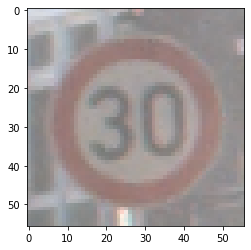

In [ ]:
# TODO: Plot an image from the dataset using matplotlib


image = cv2.imread('DL_Data_sets/German_Traffic_signs/Images/00001/00000_00002.ppm')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.imshow(image)

##### Separates the data into different folders

In [3]:
import os, glob, random, math
from shutil import copyfile

# TODO: Check out glob and copyfile, and create the test and train folders as needed. Each of the folders must have folders for each of the categories.
def get_subfolders(path):
    return [os.path.basename(x) for x in glob.glob(path + '/*') if os.path.isdir(x)]

#print(get_subfolders('./DL_Data_sets/German_Traffic_signs/Images'))
def copy_files(path, train_path, test_path):
    subfolders = get_subfolders(path)
    for subfolder in subfolders:
        files = glob.glob(path + '/' + subfolder + '/*')
        random.shuffle(files)
        train_files = files[:int(len(files) * 0.8)]
        test_files = files[int(len(files) * 0.8):]
        for file in train_files:
            # create the train folder if it doesn't exist
            if not os.path.exists(train_path + '/' + subfolder):
                os.makedirs(train_path + '/' + subfolder)
            copyfile(file, train_path + '/' + subfolder + '/' + os.path.basename(file))
        for file in test_files:
            # create the test folder if it doesn't exist
            if not os.path.exists(test_path + '/' + subfolder):
                os.makedirs(test_path + '/' + subfolder)
            copyfile(file, test_path + '/' + subfolder + '/' + os.path.basename(file))


copy_files('./DL_Data_sets/German_Traffic_signs/Images', './DL_Data_sets/German_Traffic_signs/Train', './DL_Data_sets/German_Traffic_signs/Test')




In [13]:
!cd DL_Data_sets/ && cd German_Traffic_signs && ls 

Images	Readme-Images.txt  Test  Train


## Model definition and training
---

##### Define and compile a model to classify the images. You can look at other models for inspiration. **Don't use transfer learning for this step.**

In [18]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(43, activation='softmax'))

network.summary()
earlyStop = EarlyStopping(monitor='val_accuracy', patience=3)
network.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# TODO: Define a model to classify the images. Don't forget to show its summary and compile it.

# network = models.Sequential()
# network.add(layers.Dense(128, activation='relu', input_shape=(150, 150, 3)))
# network.add(layers.BatchNormalization())
# network.add(layers.Dense(128, activation='relu'))
# network.add(layers.BatchNormalization())
# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(128, activation='relu'))
# network.add(layers.BatchNormalization())
# network.add(layers.Dropout(0.5))
# network.add(layers.Dense(128, activation='relu'))
# network.add(layers.BatchNormalization())
# network.add(layers.Dense(43, activation='softmax'))

# network.summary()

# network.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

### Add data agumentation to the data set.

##### Define the image data generator. Define transformations that make sense for the data set.

In [15]:
# TODO: Define an image data generator for training and for testing.
# TODO: Create generators for training, validation, and testing.
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/Train',
    target_size=(150, 150),
    batch_size=20,
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/Train',
    target_size=(150, 150),
    batch_size=20,
    subset='validation'
)

test_generator = test_data_gen.flow_from_directory(
    'DL_Data_sets/German_Traffic_signs/Test',
    target_size=(150, 150),
    batch_size=20,
    
)


Found 25081 images belonging to 43 classes.
Found 6252 images belonging to 43 classes.
Found 7876 images belonging to 43 classes.


##### Define the train, validation, and test generators

##### Using matplotlib, visualize images from the test generator. Create a figure of 20 images, with 5 images per row.

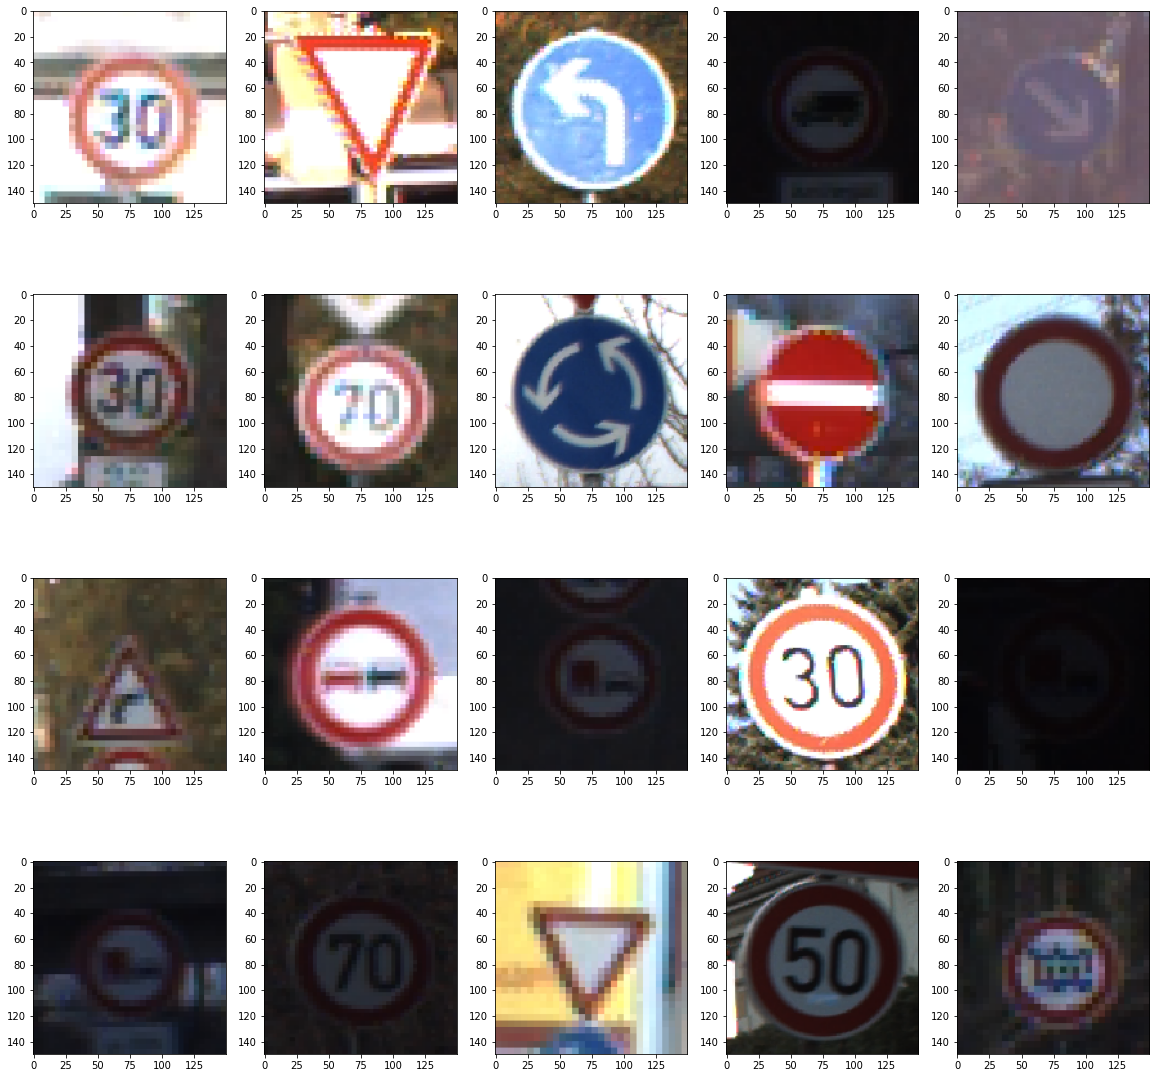

In [16]:
# TODO: Create a figure with images from the test generator.

(imgs, labels) = test_generator.next()

batch_size = 20
imgs_per_row = 5

f, plots = plt.subplots((batch_size+imgs_per_row-1)//imgs_per_row, imgs_per_row, figsize=(20,20))
plots = [plot for sublist in plots for plot in sublist]

for img, label, plot in zip(imgs, labels, plots):
    plot.imshow(img, cmap='gray')

### Train the model using the generators. Use model checkpoints and early stopping during training. **Don't forget to use a GPU for training.**

In [19]:
# TODO: Train the model. Remember to use Early stopping.

history = network.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator
)

Epoch 1/30
1255/1255 [==============================] - 32s 24ms/step - loss: 1.3505 - accuracy: 0.6276 - val_loss: 1.0540 - val_accuracy: 0.7300
Epoch 2/30
1255/1255 [==============================] - 29s 23ms/step - loss: 0.2077 - accuracy: 0.9449 - val_loss: 0.7561 - val_accuracy: 0.8220
Epoch 3/30
1255/1255 [==============================] - 30s 24ms/step - loss: 0.0899 - accuracy: 0.9769 - val_loss: 0.6326 - val_accuracy: 0.8623
Epoch 4/30
1255/1255 [==============================] - 29s 23ms/step - loss: 0.0508 - accuracy: 0.9870 - val_loss: 0.5526 - val_accuracy: 0.8840
Epoch 5/30
1255/1255 [==============================] - 30s 24ms/step - loss: 0.0346 - accuracy: 0.9915 - val_loss: 0.5825 - val_accuracy: 0.8904
Epoch 6/30
1255/1255 [==============================] - 29s 23ms/step - loss: 0.0235 - accuracy: 0.9939 - val_loss: 0.6103 - val_accuracy: 0.9002
Epoch 7/30
1255/1255 [==============================] - 29s 23ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.6949 -

## Model evaluation
---

##### Evaluate the performance of the model with the test generator.

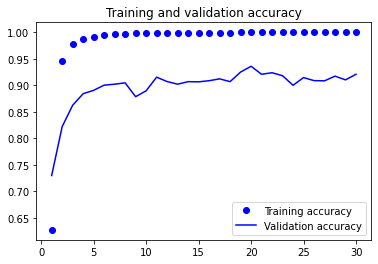

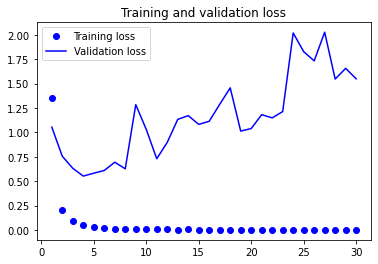

In [20]:
# TODO: Evaluate the model, and print the results.
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(accuracy) + 1) 

plt.plot(epochs, accuracy, 'bo', label='Training accuracy') 

plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend() 

plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()



##### Plot the results of training: plot training and validation accuracy, and loss.

In [21]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

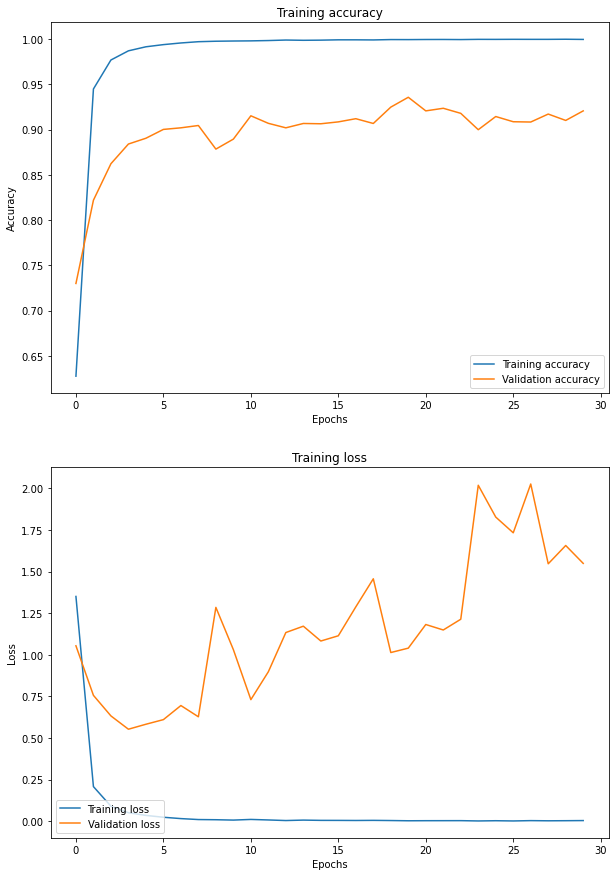

In [22]:
# TODO: Plot the results of the training and validation accuracy.
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')



# TODO: Plot the results of the training and validation loss.

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

## Model using Transfer Learning
---

#### Create a model using transfer learning, train the model and do predictions with it on the test dataset.

#### Make and train a new model using transfer learning

In [ ]:
# Save model
# network.save('feature_extraction.model.hdf5')
# network.save_weights('feature_extraction.weights.hdf5')

In [ ]:
!ls
# #load model
# model = models.load_model('./feature_extraction.model.hdf5')

# model.load_weights('./feature_extraction.weights.hdf5')

DL_Data_sets  sample_data


In [23]:
from tensorflow.keras.applications import VGG16

In [29]:
conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(150,150,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
conv_base.trainable = True
set_trainable = False 

for layer in conv_base.layers: 
  if layer.name == 'block5_conv1' or layer.name == 'block5_conv2' or layer.name == 'block5_conv3' or layer.name == 'block5_pool':
    set_trainable = True 
    
  if set_trainable: 
    layer.trainable = True 
  else: 
    layer.trainable = False

In [31]:
# TODO: Create a model using transfer learning

model_extended = models.Sequential() 
model_extended.add(conv_base) 
model_extended.add(layers.Flatten()) 
model_extended.add(layers.Dense(512, activation='relu')) 
model_extended.add(layers.Dense(43, activation='softmax'))

model_extended.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                                 
 dense_7 (Dense)             (None, 43)                22059     
                                                                 
Total params: 18,931,563
Trainable params: 11,296,299
Non-trainable params: 7,635,264
_________________________________________________________________


#### Plot the results of training and evaluation

In [32]:
# TODO: Plot training and print the evaluation results
model_extended.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

history2 = model_extended.fit( train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 118ms/step - loss: 2.6515 - accuracy: 0.3094 - val_loss: 2.1073 - val_accuracy: 0.4690
Epoch 2/30
100/100 [==============================] - 12s 120ms/step - loss: 1.6154 - accuracy: 0.5475 - val_loss: 1.6475 - val_accuracy: 0.5270
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 1.1292 - accuracy: 0.6855 - val_loss: 1.2482 - val_accuracy: 0.6480
Epoch 4/30
100/100 [==============================] - 12s 118ms/step - loss: 0.8328 - accuracy: 0.7650 - val_loss: 1.1100 - val_accuracy: 0.6860
Epoch 5/30
100/100 [==============================] - 11s 115ms/step - loss: 0.6979 - accuracy: 0.8065 - val_loss: 0.9690 - val_accuracy: 0.7430
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5469 - accuracy: 0.8470 - val_loss: 0.9867 - val_accuracy: 0.7210
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4511 - accuracy: 0.8690 - val_loss: 0.8467 - val_ac

In [33]:
history_dict2 = history2.history

loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

acc_values2 = history_dict2['accuracy']
val_acc_values2 = history_dict2['val_accuracy']

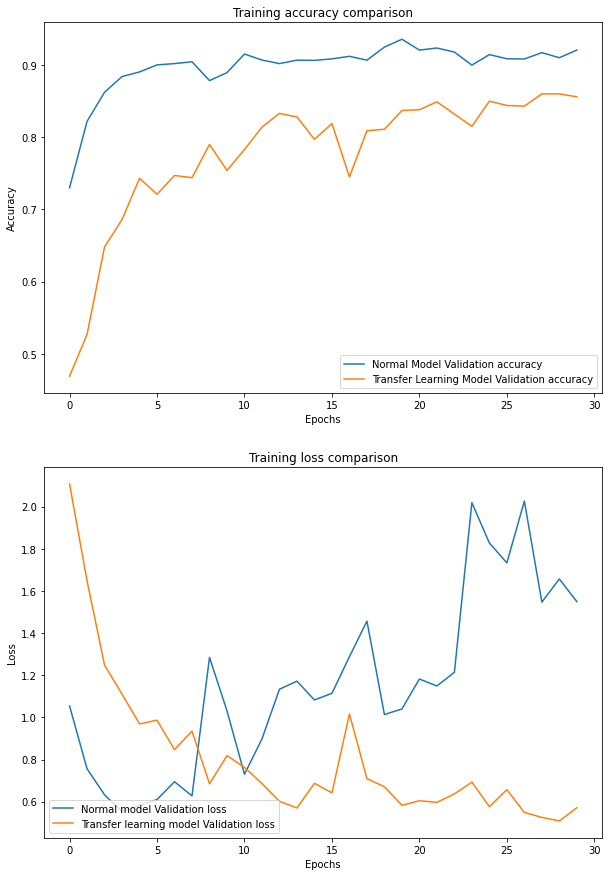

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(val_acc_values, label="Normal Model Validation accuracy")
ax[0].plot(val_acc_values2, label="Transfer Learning Model Validation accuracy")
ax[0].set_title("Training accuracy comparison")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(val_loss_values, label="Normal model Validation loss")
ax[1].plot(val_loss_values2, label="Transfer learning model Validation loss")
ax[1].set_title("Training loss comparison")
ax[1].legend(loc='lower left')


#### Makes predictions using the test dataset

In [ ]:
# TODO: Make predictions

In [ ]:
# (imgs, labels) = test_generator.next()

# batch_size = 6
# imgs_per_row = 2

# f, plots = plt.subplots((batch_size+imgs_per_row-1)//imgs_per_row, imgs_per_row, figsize=(20,20))
# plots = [plot for sublist in plots for plot in sublist]

# for img, label, plot in zip(imgs, labels, plots):
#     plot.set_title(np.argmax(label))
#     plot.imshow(img, cmap='gray')

Accuracy:  100.0


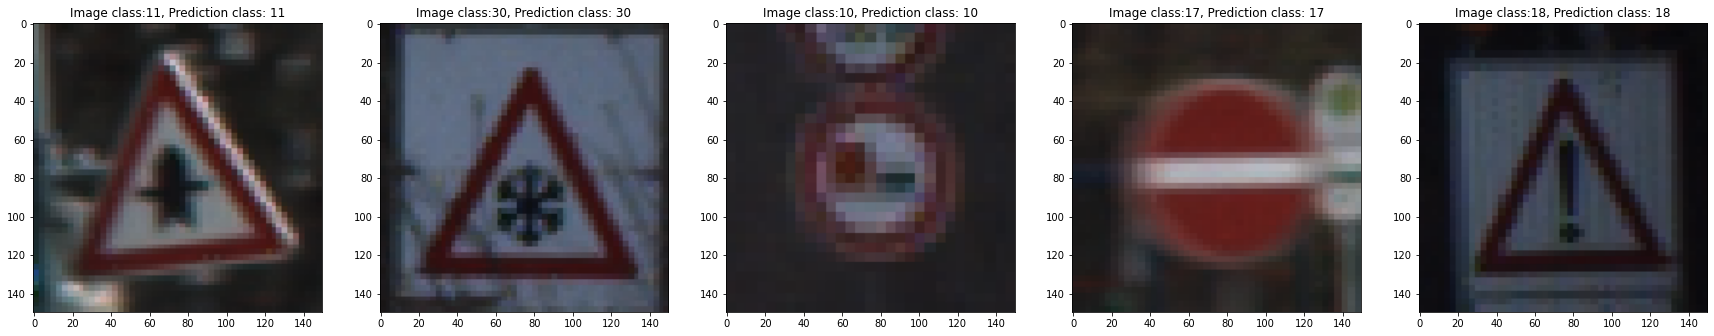

In [86]:
(imgs, labels) = test_generator.next()

# print(np.argmax(labels[0]))
# print(np.argmax(prediction[0]))
predictions = []
score = 0

f, ax = plt.subplots(1,5, figsize=(30, 30))
for i in range(5):
  predictions.append(network.predict(imgs[i].reshape((1, 150, 150, 3))))
  ax[i].imshow(imgs[i], cmap='gray')
  original_label = np.argmax(labels[i])
  predicted_label = np.argmax(predictions[i])
  ax[i].set_title("Image class:" +str(original_label) + ", Prediction class: " + str(predicted_label))
  if original_label == predicted_label:
      score = score + 1

score = (score/5)*100

print("Accuracy: ",score)

# predict_image = (imgs[i].reshape((1, 150, 150, 3)))
# prediction = network.predict(predict_image)
# 


Accuracy:  60.0


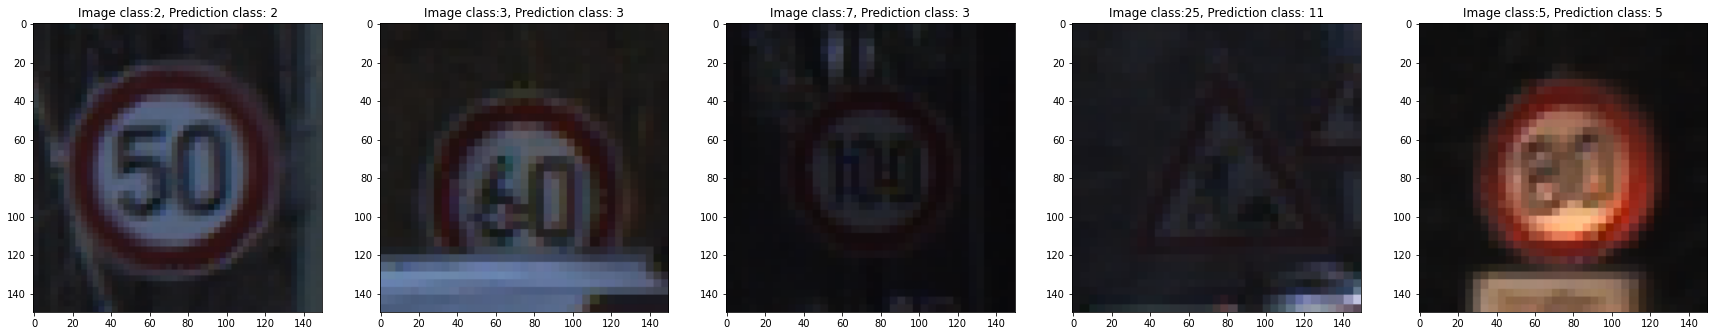

In [85]:
(imgs, labels) = test_generator.next()

predictions = []
score = 0

f, ax = plt.subplots(1,5, figsize=(30, 30))
for i in range(5):
  predictions.append(model_extended.predict(imgs[i].reshape((1, 150, 150, 3))))
  ax[i].imshow(imgs[i], cmap='gray')
  original_label = np.argmax(labels[i])
  predicted_label = np.argmax(predictions[i])
  ax[i].set_title("Image class:" +str(original_label) + ", Prediction class: " + str(predicted_label))
  if original_label == predicted_label:
      score = score + 1

score = (score/5)*100

print("Accuracy: ",score)

## Test the models on new images
---

Download new images of traffic signs, and test both models on the images. Download at least 5 images. Plot them with the predicted class. 

Add a text cell with your conclusions on the performance of the models on the new images.

#### Download new images, and make predictions on them.

In [ ]:
# TODO: Make predictions on new images.

!wget https://c8.alamy.com/comp/F75XC2/german-traffic-sign-on-a-cloudy-day-F75XC2.jpg
!wget https://media.gettyimages.com/photos/german-traffic-signs-picture-id459380917?s=2048x2048
!wget https://d1gymyavdvyjgt.cloudfront.net/drive/images/uploads/headers/ws_cropper/1_0x0_790x520_0x520_german-road-signs-header.jpg
!wget https://traffic-rules.com/img/europe/de/signs/warning/warning-crossroad-side-roads.png
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjOI4cRof7wlcjH24jDMKZzWYncynP4-9DUQ&usqp=CAU

In [38]:
def preprocess(image):
  image = cv2.resize(image, dsize=(150, 150))

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

In [ ]:
img1 = cv2.imread('german-traffic-sign-on-a-cloudy-day-F75XC2.jpg')
img2 = cv2.imread('german-traffic-signs-picture-id459380917?s=2048x2048')
img3 = cv2.imread('1_0x0_790x520_0x520_german-road-signs-header.jpg')
img4 = cv2.imread('warning-crossroad-side-roads.png')
img5 = cv2.imread('images?q=tbn:ANd9GcTjOI4cRof7wlcjH24jDMKZzWYncynP4-9DUQ')

images = []
images.append(img1)
images.append(img2)
images.append(img3)
images.append(img4)
images.append(img5)

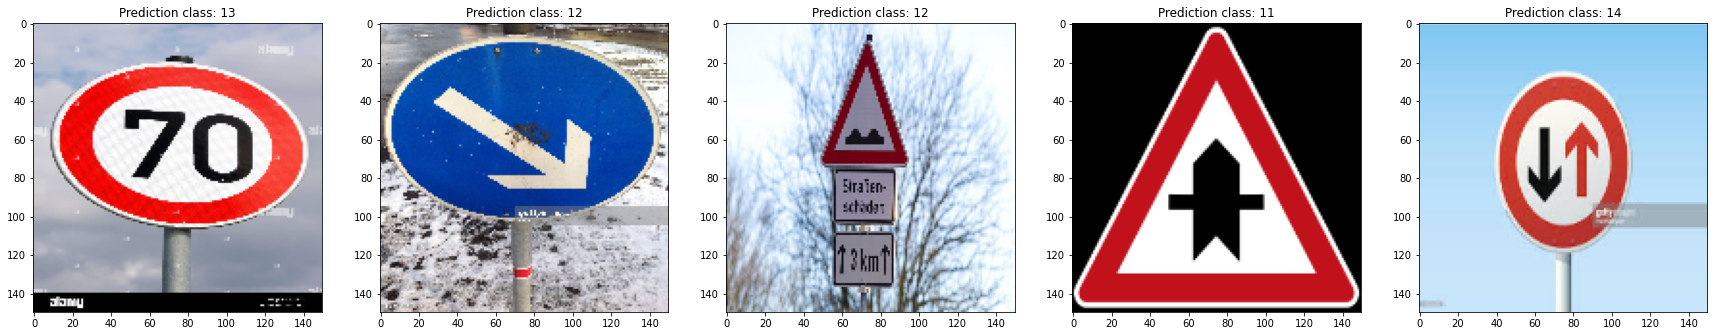

In [67]:
#!ls
# plt.imshow(images[0])
f, ax = plt.subplots(1,5, figsize=(30, 30))

# ax[0].imshow(images[0])
# ax[1].imshow(images[1])
for i in range(len(images)):
  image = preprocess(images[i])

  predict_image = image.reshape(1, 150, 150, 3)

  prediction = network.predict(predict_image)
  predicted_label = np.argmax(prediction)
  ax[i].imshow(image, cmap='gray')
  ax[i].set_title("Prediction class: " + str(predicted_label))


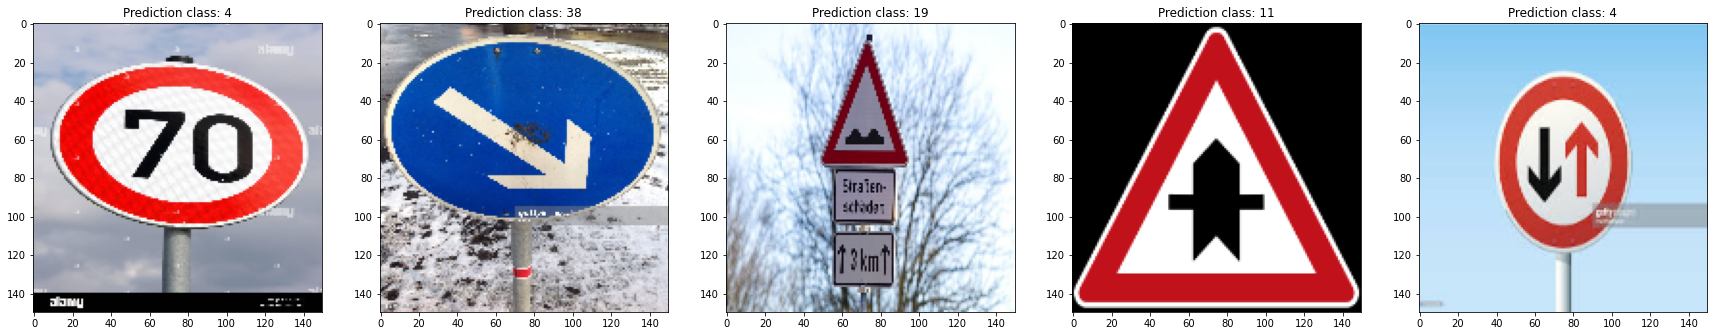

In [66]:
f, ax = plt.subplots(1,5, figsize=(30, 30))

for i in range(len(images)):
  image = preprocess(images[i])

  predict_image = image.reshape(1, 150, 150, 3)

  prediction = model_extended.predict(predict_image)
  predicted_label = np.argmax(prediction)
  ax[i].imshow(image, cmap='gray')
  ax[i].set_title("Prediction class: " + str(predicted_label))

**Conclusiones:**

El primer modelo tomo aproximadamente 6 veces más tiempo en entrenarse que el segundo, esto ocurre principalmente porque el modelo se esta entrenando desde cero y comienza con pesos aleatorios, por otro lado, al utilizar un modelo ya previamente entrenado se ahorra tiempo ya que no tiene que ajustar todo el modelo y simplemente se adapta a las nuevas clases agregadas.

A la hora de cargar imagenes nuevas podemos ver que el modelo de transferlearning obtuvo todas las predicciones correctas a diferencia del modelo que entrenamos desde cero.

No obstante, que se entrene mas rapido no nos garantiza una mayor precision. Esto ya que el modelo entrenado desde cero esta especificamente planeado para identificar imagenes de este data set (esto se puede apreciar en las pruebas con imagenes del test set)